# Map Density of Green Sites in Oxfordshire
Green Sites data from:
https://www.ordnancesurvey.co.uk/business-and-government/products/os-open-greenspace.html

Contains Ordnance Survey data © Crown copyright and database right 2018

Workflow derived from:
https://sensitivecities.com/so-youd-like-to-make-a-map-using-python-EN.html

In [1]:
import pandas as pd
import geopandas as gpd
from geopandas.tools import sjoin
from fiona.crs import from_epsg
import numpy as np
from pysal.esda.mapclassify import Natural_Breaks as nb
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.collections import PatchCollection
from matplotlib import colors as c
from descartes import PolygonPatch

In [2]:
df_wards = gpd.GeoDataFrame.from_file('data/oxford_wards.shp')
df_wards.crs = from_epsg(27700)
df_wards.head()

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry
0,Watchfield & Shrivenham Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,1.0,502.0,126167.0,8592.0,E05009776,9945.987,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((424256.5987316867 186172.6978748109,..."
1,Stanford Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,3.0,503.0,126171.0,8578.0,E05009770,4904.378,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((429912.4962754526 183252.7037144447,..."
2,Thames Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,7.0,504.0,126169.0,8622.0,E05009773,7341.527,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((435788.0010216464 195124.8953349439,..."
3,Ridgeway Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,39.0,511.0,126168.0,8566.0,E05009769,5984.525,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((431866.5015508634 189607.8045857432,..."
4,Wantage Charlton Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,41.0,513.0,49231.0,8562.0,E05009775,1090.960,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((438865.4041171432 187297.3959333405,..."


In [3]:
# read in the green site locations
df_green = gpd.GeoDataFrame.from_file('data/greenspace_site.shp')
df_green.crs = from_epsg(27700)

# get the central location inside the polygon and replace the geometry with that
df_green['geometry'] = df_green['geometry'].apply(lambda x: x.representative_point())
df_green.head()

,id,function,distName1,distName2,distName3,distName4,geometry
0,64C8F68F-D001-6BEA-E053-A03BA40A2DD7,Play Space,None,None,None,None,POINT (445969.6452547936 244111.83)
1,64C8F68F-D251-6BEA-E053-A03BA40A2DD7,Playing Field,None,None,None,None,POINT (449169.7532038803 245970.19)
2,64C8F68F-D274-6BEA-E053-A03BA40A2DD7,Allotments Or Community Growing Spaces,None,None,None,None,POINT (449390.5517402941 245985.725)
3,64C8F64E-7209-6BEA-E053-A03BA40A2DD7,Play Space,None,None,None,None,POINT (449149.6161458055 246081.995)
4,64C8F68F-D184-6BEA-E053-A03BA40A2DD7,Allotments Or Community Growing Spaces,None,None,None,None,POINT (448987.0145739516 246269.665)


In [4]:
# Perform an inner join between the geometry columns (points, wards) of the plaques and wards dataframes
join_inner_df = sjoin(df_green, df_wards, how="inner")

join_inner_df.head()

,id,function,distName1,distName2,distName3,distName4,geometry,index_right,NAME,AREA_CODE,...,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1
0,64C8F68F-D001-6BEA-E053-A03BA40A2DD7,Play Space,None,None,None,None,POINT (445969.6452547936 244111.83),45,"Cropredy, Sibfords & Wroxton Ward",DIW,...,713.0,126926.0,8735.0,E05010929,12200.226,0.0,VA,CIVIL VOTING AREA,None,None
1,64C8F68F-D251-6BEA-E053-A03BA40A2DD7,Playing Field,None,None,None,None,POINT (449169.7532038803 245970.19),45,"Cropredy, Sibfords & Wroxton Ward",DIW,...,713.0,126926.0,8735.0,E05010929,12200.226,0.0,VA,CIVIL VOTING AREA,None,None
2,64C8F68F-D274-6BEA-E053-A03BA40A2DD7,Allotments Or Community Growing Spaces,None,None,None,None,POINT (449390.5517402941 245985.725),45,"Cropredy, Sibfords & Wroxton Ward",DIW,...,713.0,126926.0,8735.0,E05010929,12200.226,0.0,VA,CIVIL VOTING AREA,None,None
3,64C8F64E-7209-6BEA-E053-A03BA40A2DD7,Play Space,None,None,None,None,POINT (449149.6161458055 246081.995),45,"Cropredy, Sibfords & Wroxton Ward",DIW,...,713.0,126926.0,8735.0,E05010929,12200.226,0.0,VA,CIVIL VOTING AREA,None,None
4,64C8F68F-D184-6BEA-E053-A03BA40A2DD7,Allotments Or Community Growing Spaces,None,None,None,None,POINT (448987.0145739516 246269.665),45,"Cropredy, Sibfords & Wroxton Ward",DIW,...,713.0,126926.0,8735.0,E05010929,12200.226,0.0,VA,CIVIL VOTING AREA,None,None


In [5]:
# Join the plaque counts *per ward* to the wards
# This works because the result of the dataframe join shows all points and their associated ward code
df_wards = df_wards.merge(
    join_inner_df['CODE'].value_counts().to_frame(),
    how='left',
    left_on='CODE', right_index=True)

df_wards.head()

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE_x,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry,CODE_y
index_right,,,,,,,,,,,,,,,,,
0,Watchfield & Shrivenham Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,1.0,502.0,126167.0,8592.0,E05009776,9945.987,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((424256.5987316867 186172.6978748109,...",61
1,Stanford Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,3.0,503.0,126171.0,8578.0,E05009770,4904.378,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((429912.4962754526 183252.7037144447,...",16
2,Thames Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,7.0,504.0,126169.0,8622.0,E05009773,7341.527,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((435788.0010216464 195124.8953349439,...",25
3,Ridgeway Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,39.0,511.0,126168.0,8566.0,E05009769,5984.525,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((431866.5015508634 189607.8045857432,...",23
4,Wantage Charlton Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,41.0,513.0,49231.0,8562.0,E05009775,1090.960,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((438865.4041171432 187297.3959333405,...",21


In [6]:
# rename count column to something meaningful
df_wards.rename(columns={'CODE_y': 'count'}, inplace=True)
df_wards.head()

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE_x,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry,count
index_right,,,,,,,,,,,,,,,,,
0,Watchfield & Shrivenham Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,1.0,502.0,126167.0,8592.0,E05009776,9945.987,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((424256.5987316867 186172.6978748109,...",61
1,Stanford Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,3.0,503.0,126171.0,8578.0,E05009770,4904.378,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((429912.4962754526 183252.7037144447,...",16
2,Thames Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,7.0,504.0,126169.0,8622.0,E05009773,7341.527,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((435788.0010216464 195124.8953349439,...",25
3,Ridgeway Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,39.0,511.0,126168.0,8566.0,E05009769,5984.525,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((431866.5015508634 189607.8045857432,...",23
4,Wantage Charlton Ward,DIW,District Ward,OXFORDSHIRE_COUNTY,41.0,513.0,49231.0,8562.0,E05009775,1090.960,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((438865.4041171432 187297.3959333405,...",21


In [7]:
df_wards[['NAME', 'HECTARES', 'count']].dropna().sort_values('count', ascending=False).head(10)

,NAME,HECTARES,count
index_right,,,
45,"Cropredy, Sibfords & Wroxton Ward",12200.226,69
0,Watchfield & Shrivenham Ward,9945.987,61
48,Fringford & Heyfords Ward,13439.717,60
47,Deddington Ward,10400.457,57
46,Launton & Otmoor Ward,12200.319,57
28,Woodcote & Rotherfield Ward,8450.340,56
54,Bicester South & Ambrosden Ward,1107.570,50
26,Cholsey Ward,6651.107,42
30,Benson & Crowmarsh Ward,4030.545,36


In [8]:
# greenspace density per hectare
df_wards['density'] = (df_wards['count'] / df_wards['HECTARES'])
df_wards.replace(to_replace={'density': {0: np.nan}}, inplace=True)

if len(df_wards[df_wards['density'].isnull()]) > 0:
    # fill empty densities with with nan
    df_wards['density'].fillna(np.nan, inplace=True)

df_wards[['NAME', 'HECTARES', 'count', 'density']].sort_values('density', ascending=True).head(10)

,NAME,HECTARES,count,density
index_right,,,,
34,Watlington Ward,7509.788,21,0.002796
63,"Kingham, Rollright and Enstone Ward",10403.382,32,0.003076
62,Chadlington and Churchill Ward,6756.966,22,0.003256
1,Stanford Ward,4904.378,16,0.003262
76,North Leigh Ward,1512.603,5,0.003306
2,Thames Ward,7341.527,25,0.003405
74,Ascott and Shipton Ward,2580.160,9,0.003488
66,Brize Norton and Shilton Ward,3934.597,14,0.003558
69,The Bartons Ward,3079.210,11,0.003572


In [9]:
# Calculate Jenks natural breaks for density
breaks = nb(
    df_wards[df_wards['density'].notnull()].density.values,
    initial=300,
    k=5)
# the notnull method lets us match indices when joining
jb = pd.DataFrame({'jenks_bins': breaks.yb}, index=df_wards[df_wards['density'].notnull()].index)
df_wards = df_wards.join(jb)

if len(df_wards[df_wards['density'].isnull()]) > 0:
    df_wards.jenks_bins.fillna(0, inplace=True)

In [10]:
jenks_labels = ["<= %0.2f/hectare (%s wards)" % (b, c) for b, c in zip(
    breaks.bins, breaks.counts)]

if len(df_wards[df_wards['density'].isnull()]) > 0:
    jenks_labels.insert(-1, 'No green sites (%s wards)' % len(df_wards[df_wards['density'].isnull()]))

In [11]:
# Convenience functions for working with colour ramps and bars
def colorbar_index(ncolors, cmap, labels=None, **kwargs):
    """
    This is a convenience function to stop you making off-by-one errors
    Takes a standard colour ramp, and discretizes it,
    then draws a colour bar with correctly aligned labels
    """
    cmap = cmap_discretize(cmap, ncolors)
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    if labels:
        colorbar.set_ticklabels(labels)
    return colorbar

def cmap_discretize(cmap, N):
    """
    Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)

    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], colors_rgba[i, ki]) for i in range(N + 1)]
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d" % N, cdict, 1024)

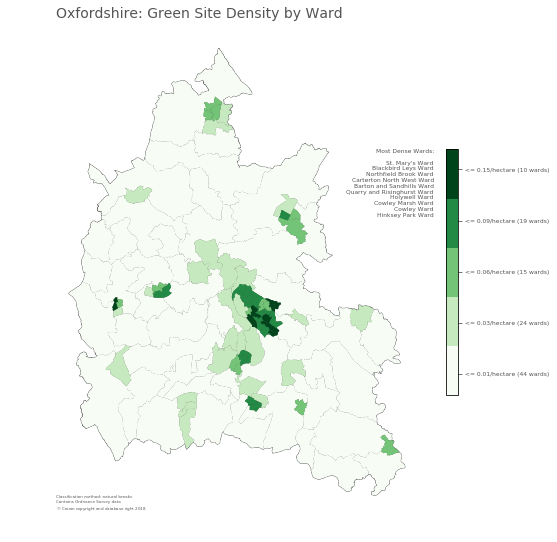

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
ax.set_axis_off()
ax.set_aspect('equal')

# use a blue colour ramp - we'll be converting it to a map using cmap()
cmap = plt.get_cmap('Greens')

# Add a colour bar
cb = colorbar_index(ncolors=len(jenks_labels), cmap=cmap, shrink=0.5, labels=jenks_labels)
cb.ax.tick_params(labelsize=6, labelcolor ='#555555', color ='#555555')

# Show highest densities, in descending order
highest = '\n'.join(
    value[0] for _, value in df_wards[(df_wards['jenks_bins'] == 4)][:10].sort_values('count').iterrows())
highest = 'Most Dense Wards:\n\n' + highest

# Subtraction is necessary for precise y coordinate alignment
details = cb.ax.text(
    -1., 1,
    highest,
    ha='right', va='top',
    size=6,
    color='#555555')

# Bin method, copyright and source data info
smallprint = ax.text(
    0.01, 0.01,
    'Classification method: natural breaks\nContains Ordnance Survey data\n$\copyright$ Crown copyright and database right 2018',
    ha='left', va='bottom',
    size=4,
    color='#555555',
    transform=ax.transAxes)

# draw wards with grey outlines
df_wards['patches'] = df_wards['geometry'].map(lambda x: PolygonPatch(x, ec='#555555', lw=.8, alpha=1, zorder=4))
pc = PatchCollection(df_wards['patches'].values, match_original=True)

# # impose our colour map onto the patch collection
norm = Normalize()

pc.set_facecolor(cmap(norm(df_wards['jenks_bins'].values)))
ax.add_collection(pc)
df_wards.plot(column='jenks_bins', k=7, cmap=cmap, norm=norm, ax=ax)

maptitle = ax.text(
    0.01, 1.01,
    'Oxfordshire: Green Site Density by Ward',
    ha='left', va='bottom',
    size=14,
    color='#555555',
    transform=ax.transAxes)

# this will set the image width to 722px at 100dpi
plt.tight_layout()
fig.set_size_inches(8,8)
plt.savefig('images/oxon_green_density.png', dpi=300, alpha=True)
plt.show()